In [1]:
!pip install earthpy
!pip install rioxarray

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 KB 2.2 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / done
  Getting requirements to build wheel ... - \ | / - done
  Preparing metadata (pyproject.toml) ... - \ | / - done
  Created wheel for rioxarray: filename=rioxarray-0.9.1-py3-none-any.whl size=54609 sha256=3f7ec6608382be96b4d527f8f6098e3d8d77741bfb180251e8c44b902416659f
  Stored in directory: /root/.cache/pip/wheels/07/da/9e/1cc57b2e7a29a206893db83e984a341e2e94378263e0798229
Successfully built rioxarray


In [2]:
import os
import time
import matplotlib.pyplot as plt
import numpy as np
import rioxarray as rxr
from rioxarray.merge import merge_arrays
import geopandas as gpd
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [3]:
c2004_path = "../input/2204-d-havza-s-n-rlar-na-k-rpmak-l5-2/Year_2004"
c2003_path = "../input/2204-d-havza-s-n-rlar-na-k-rpmak-l5-2/Year_2003"
c2002_path = "../input/2204-d-havza-s-n-rlar-na-k-rpmak-l5-2/Year_2002"
c2001_path = "../input/2204-d-havza-s-n-rlar-na-k-rpmak-l5-2/Year_2001"
c2000_path = "../input/2204-d-havza-s-n-rlar-na-k-rpmak-l5-2/Year_2000"

cpath_list = [c2004_path, c2003_path, c2002_path, c2001_path, c2000_path]

In [4]:
c2004 = os.listdir(c2004_path)
c2003 = os.listdir(c2003_path)
c2002 = os.listdir(c2002_path)
c2001 = os.listdir(c2001_path)
c2000 = os.listdir(c2000_path)

clipped_year = [c2004, c2003, c2002, c2001, c2000]

In [5]:
months = ("06", "07", "08", "09" ,"10", "11")
for year in clipped_year:
    for band in year:
        if band[21:23] in months:
            continue
        else:
            year.remove(band)

In [6]:
c2004

['LT05_L2SP_177033_20040630_20200903_02_T1_SR_B3.TIF',
 'LT05_L2SP_177034_20040902_20200903_02_T1_SR_B4.TIF',
 'LT05_L2SP_178034_20040909_20200903_02_T2_SR_B4.TIF',
 'LT05_L2SP_176033_20040709_20200903_02_T1_SR_B4.TIF',
 'LT05_L2SP_176034_20040826_20200903_02_T1_SR_B3.TIF',
 'LT05_L2SP_177034_20040801_20200903_02_T1_SR_B3.TIF',
 'LT05_L2SP_176034_20040607_20200903_02_T1_SR_B3.TIF',
 'LT05_L2SP_176034_20040826_20200903_02_T1_SR_B4.TIF',
 'LT05_L2SP_176033_20040709_20200903_02_T1_SR_B3.TIF',
 'LT05_L2SP_178034_20041011_20200903_02_T2_SR_B4.TIF',
 'LT05_L2SP_178034_20040723_20200903_02_T1_SR_B3.TIF',
 'LT05_L2SP_177034_20040918_20200903_02_T1_SR_B3.TIF',
 'LT05_L2SP_177034_20040630_20200903_02_T1_SR_B4.TIF',
 'LT05_L2SP_176034_20040927_20200903_02_T2_SR_B3.TIF',
 'LT05_L2SP_176033_20040826_20200903_02_T1_SR_B4.TIF',
 'LT05_L2SP_177034_20040630_20200903_02_T1_SR_B3.TIF',
 'LT05_L2SP_177034_20040801_20200903_02_T1_SR_B4.TIF',
 'LT05_L2SP_177033_20040630_20200903_02_T1_SR_B4.TIF',
 'LT05_L2S

In [7]:
b4list2004 = []
b3list2004 = []

b4list2003 = []
b3list2003 = []

b4list2002 = []
b3list2002 = []

b4list2001 = []
b3list2001 = []

b4list2000 = []
b3list2000 = []

b4list = [b4list2004, b4list2003, b4list2002,
          b4list2001, b4list2000]
b3list = [b3list2004, b3list2003, b3list2002,
          b3list2001, b3list2000]

In [8]:
def whichband(b4lst, b3lst, lst):
    for i in lst:
        if i.endswith("B4.TIF"):
            b4lst.append(i)
        elif i.endswith("B3.TIF"):
            b3lst.append(i)
        else:
            print("Atlandı")
            
    b4lst.sort()
    b3lst.sort()

In [9]:
for i in range(len(clipped_year)):
    whichband(b4list[i], b3list[i], clipped_year[i])

In [10]:
b4list[0]

['LT05_L2SP_176033_20040709_20200903_02_T1_SR_B4.TIF',
 'LT05_L2SP_176033_20040826_20200903_02_T1_SR_B4.TIF',
 'LT05_L2SP_176034_20040607_20200903_02_T1_SR_B4.TIF',
 'LT05_L2SP_176034_20040826_20200903_02_T1_SR_B4.TIF',
 'LT05_L2SP_176034_20040927_20200903_02_T2_SR_B4.TIF',
 'LT05_L2SP_177033_20040630_20200903_02_T1_SR_B4.TIF',
 'LT05_L2SP_177034_20040630_20200903_02_T1_SR_B4.TIF',
 'LT05_L2SP_177034_20040801_20200903_02_T1_SR_B4.TIF',
 'LT05_L2SP_177034_20040902_20200903_02_T1_SR_B4.TIF',
 'LT05_L2SP_177034_20040918_20200903_02_T1_SR_B4.TIF',
 'LT05_L2SP_178034_20040723_20200903_02_T1_SR_B4.TIF',
 'LT05_L2SP_178034_20040909_20200903_02_T2_SR_B4.TIF',
 'LT05_L2SP_178034_20041011_20200903_02_T2_SR_B4.TIF',
 'LT05_L2SP_178034_20041112_20200903_02_T1_SR_B4.TIF']

In [11]:
os.mkdir("./Band4")

In [12]:
os.mkdir("./Band3")

In [13]:
def merging(data, ypath, wband, year):
    arrays = []
    for i in data:
        path = os.path.join(ypath, i)
        band = rxr.open_rasterio(path, masked=True).squeeze()
        arrays.append(band)
    
    merged = merge_arrays(arrays)
    if wband == "_B4.TIF":
        outpath = os.path.join("./Band4", "Havza_"+str(year)+"_B4.TIF")
    elif wband == "_B5.TIF":
        outpath = os.path.join("./Band5", "Havza_"+str(year)+"_B5.TIF")
    elif wband == "_B3.TIF":
        outpath = os.path.join("./Band3", "Havza_"+str(year)+"_B3.TIF")
    merged.rio.to_raster(outpath)

In [14]:
year = 2000
for i in range(len(b4list)):
    merging(b4list[i], cpath_list[i], "_B4.TIF", year)
    merging(b3list[i], cpath_list[i], "_B3.TIF", year)

    print("Yıl {} yapıldı.".format(str(year)))
    year+=1
    time.sleep(2)

Yıl 2000 yapıldı.
Yıl 2001 yapıldı.
Yıl 2002 yapıldı.
Yıl 2003 yapıldı.
Yıl 2004 yapıldı.


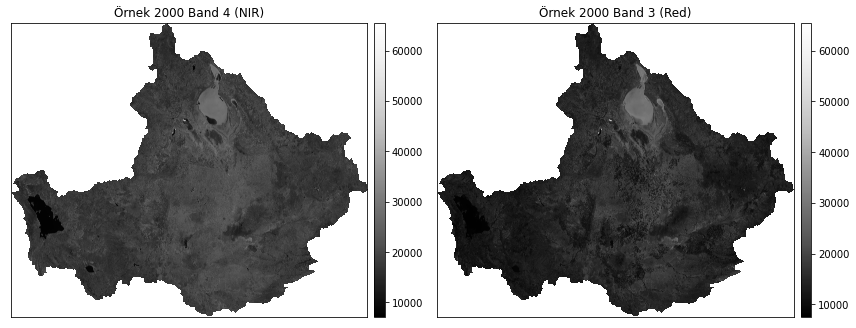

In [15]:
dene4 = rxr.open_rasterio("./Band4/Havza_2000_B4.TIF", masked = True).squeeze()
dene3 = rxr.open_rasterio("./Band3/Havza_2000_B3.TIF", masked = True).squeeze()
deneler = np.array([dene4, dene3])
ep.plot_bands(deneler, cols = 2, title = ["Örnek 2000 Band 4 (NIR)", "Örnek 2000 Band 3 (Red)"])
plt.show()

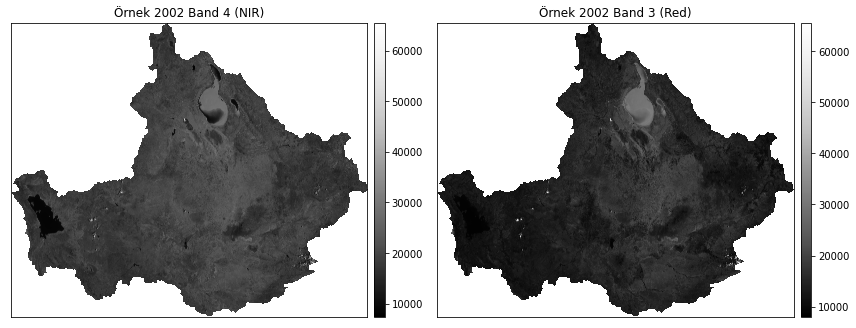

In [16]:
dene4 = rxr.open_rasterio("./Band4/Havza_2002_B4.TIF", masked = True).squeeze()
dene3 = rxr.open_rasterio("./Band3/Havza_2002_B3.TIF", masked = True).squeeze()
deneler = np.array([dene4, dene3])
ep.plot_bands(deneler, cols = 2, title = ["Örnek 2002 Band 4 (NIR)", "Örnek 2002 Band 3 (Red)"])
plt.show()